## Assignment : 14

<pre>
1. You can work with preprocessed_data.csv for the assignment. You can get the data from - <a href='https://drive.google.com/drive/u/0/folders/1CJnItndeSSJu7aragQoXWZS9-0apN6pp'>Data folder </a>
2. Load the data in your notebook.
3. After step 2 you have to train 3 types of models as discussed below. 
4. For all the model use <a href='https://scikit-learn.org/stable/modules/model_evaluation.html#roc-metrics'>'auc'</a> as a metric. check <a  href='https://stackoverflow.com/a/46844409'>this</a> and <a  href='https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807'>this</a> for using auc as a metric 
5. You are free to choose any number of layers/hiddden units but you have to use same type of architectures shown below. 
6. You can use any one of the optimizers and choice of Learning rate and momentum.
7. For all the model's use <a href='https://www.youtube.com/watch?v=2U6Jl7oqRkM'>TensorBoard</a> and plot the Metric value and Loss with epoch. While submitting, take a screenshot of plots and include those images in a separate pad and write your observations about them.
8. Make sure that you are using GPU to train the given models.
</pre>

In [1]:
#you can use gdown modules to import dataset for the assignment
#for importing any file from drive to Colab you can write the syntax as !gdown --id file_id
#you can run the below cell to import the required preprocessed data.csv file and glove vector

In [2]:
!pip install gdown

  Installing build dependencies ... - \ | / - done
  Getting requirements to build wheel ... - \ | done
  Preparing metadata (pyproject.toml) ... - \ | done
  Created wheel for gdown: filename=gdown-4.4.0-py3-none-any.whl size=14775 sha256=40ce7d11829560c4b0ee3beac7e1a4d72232882609b1ed4d78d0ad321a49ca8e
  Stored in directory: /root/.cache/pip/wheels/fb/c3/0e/c4d8ff8bfcb0461afff199471449f642179b74968c15b7a69c
Successfully built gdown


In [3]:
!gdown --id 1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
!gdown --id 1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_

/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1GpATd_pM4mcnWWIs28-s1lgqdAg2Wdv-
To: /kaggle/working/preprocessed_data.csv
100%|█████████████████████████████████████████| 124M/124M [00:00<00:00, 279MB/s]
/opt/conda/lib/python3.7/site-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1pGd5tLwA30M7wkbJKdXHaae9tYVDICJ_
To: /kaggle/working/glove_vectors
100%|█████████████████████████████████████████| 128M/128M [00:00<00:00, 252MB/s]


## <font color='red'> Model-1 </font>
Build and Train deep neural network as shown below

<img src='https://i.imgur.com/w395Yk9.png'>
ref: https://i.imgur.com/w395Yk9.png

- __Input_seq_total_text_data__ --- You have to give Total text data columns. After this use the Embedding layer to get word vectors. Use given predefined glove word vectors, don't train any word vectors. After this use LSTM and get the LSTM output and Flatten that output. 
- __Input_school_state__ --- Give 'school_state' column as input to embedding layer and Train the Keras Embedding layer. 
- __Project_grade_category__  --- Give 'project_grade_category' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_categories__ --- Give 'input_clean_categories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_clean_subcategories' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_clean_subcategories__ --- Give 'input_teacher_prefix' column as input to embedding layer and Train the Keras Embedding layer.
- __Input_remaining_teacher_number_of_previously_posted_projects._resource_summary_contains_numerical_digits._price._quantity__ ---concatenate remaining columns and add a Dense layer after that. 



Below is an example of embedding layer for a categorical columns. In below code all are dummy values, we gave only for referance. 

In [4]:
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
#input_layer = Input(shape=(n,))
#embedding = Embedding(no_1, no_2, input_length=n)(input_layer)
#flatten = Flatten()(embedding)

### 1. Go through this blog, if you have any doubt on using predefined Embedding values in Embedding layer - https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/
### 2. Please go through this link https://keras.io/getting-started/functional-api-guide/ and check the 'Multi-input and multi-output models' then you will get to know how to give multiple inputs. 

# <font color='red'> Model-1 </font>

In [5]:
# import all the libraries
#make sure that you import your libraries from tf.keras and not just keras
import tensorflow
from tensorflow.keras.layers import Input,Dense,LSTM

In [6]:
#read the csv file
import pandas as pd
df = pd.read_csv('preprocessed_data.csv')

In [7]:
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [8]:
y = df['project_is_approved'].values
df = df.drop('project_is_approved',axis = 1)

In [9]:
y

array([1, 1, 1, ..., 1, 1, 1])

In [10]:
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [11]:
df.shape

(109248, 8)

In [12]:
# perform stratified train test split on the dataset
from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train,y_test = train_test_split(df,y,test_size = 0.3,stratify = y)

In [13]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((76473, 8), (32775, 8), (76473,), (32775,))

In [14]:
y_train[:5]

array([1, 1, 1, 0, 1])

In [15]:
from keras.utils import np_utils
y_train_encoded = np_utils.to_categorical(y_train)
y_test_encoded = np_utils.to_categorical(y_test)

In [16]:
print(y_train_encoded.shape)
y_train_encoded[:5]

(76473, 2)


array([[0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

## 1.1 Text Vectorization

In [17]:
#since the data is already preprocessed, we can directly move to vectorization part
#first we will vectorize the text data
#for vectorization of text data in deep learning we use tokenizer, you can go through below references
# https://www.kdnuggets.com/2020/03/tensorflow-keras-tokenization-text-data-prep.html
#https://stackoverflow.com/questions/51956000/what-does-keras-tokenizer-method-exactly-do
# after text vectorization you should get train_padded_docs and test_padded_docs

In [18]:
import numpy as np

In [19]:
X_train_essay = X_train['essay'].astype(str)
X_test_essay = X_test['essay'].astype(str)

len_array_texts = [ len(x) for x in X_train_essay.values]

np.percentile(len_array_texts,90),max(len_array_texts)

(1469.0, 2657)

In [20]:
from keras.preprocessing import sequence, text
tk = text.Tokenizer()
tk.fit_on_texts(X_train_essay.values)

max_len = 2000
X_train_essay_seq = tk.texts_to_sequences(X_train_essay.values)
X_train_essay_padded = sequence.pad_sequences(X_train_essay_seq, maxlen=max_len)

X_test_essay_seq = tk.texts_to_sequences(X_test_essay.values)
X_test_essay_padded = sequence.pad_sequences(X_test_essay_seq, maxlen=max_len)

In [21]:
len(tk.word_docs)

48946

In [22]:
#after getting the padded_docs you have to use predefined glove vectors to get 300 dim representation for each word
# we will be storing this data in form of an embedding matrix and will use it while defining our model
# Please go through following blog's 'Example of Using Pre-Trained GloVe Embedding' section to understand how to create embedding matrix
# https://machinelearningmastery.com/use-word-embedding-layers-deep-learning-keras/

In [23]:
!wget https://nlp.stanford.edu/data/glove.42B.300d.zip
!unzip glove.42B.300d.zip

--2022-03-01 18:27:05--  https://nlp.stanford.edu/data/glove.42B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip [following]
--2022-03-01 18:27:05--  http://downloads.cs.stanford.edu/nlp/data/glove.42B.300d.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1877800501 (1.7G) [application/zip]
Saving to: ‘glove.42B.300d.zip’

glove.42B.300d.zip  100%[===================>]   1.75G  5.03MB/s    in 5m 53s  

2022-03-01 18:32:59 (5.07 MB/s) - ‘glove.42B.300d.zip’ saved [1877800501/1877800501]

Archive:  glove.42B.300d.zip
  inflating: glove.42B.300d.txt      


In [24]:
from tqdm import tqdm

word_index = tk.word_index

embeddings_index = {}
f = open("glove.42B.300d.txt",'r', encoding="utf8")
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32') #np.array([float(val) for val in values[1:]]) #np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Found %s word vectors.' % len(embeddings_index))

1917494it [02:40, 11938.22it/s]

Found 1917494 word vectors.


In [25]:
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

100%|██████████| 48946/48946 [00:00<00:00, 246568.79it/s]


## 1.2 Categorical feature Vectorization

In [26]:
# for model 1 and model 2, we have to assign a unique number to each feature in a particular categorical column.
# you can either use tokenizer,label encoder or ordinal encoder to perform the task
# label encoder gives an error for 'unseen values' (values present in test but not in train)
# handle unseen values with label encoder - https://stackoverflow.com/a/56876351
# ordinal encoder also gives error with unseen values but you can use modify handle_unknown parameter
# documentation of ordianl encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OrdinalEncoder.html
# after categorical feature vectorization you will have column_train_data and column_test_data.


In [27]:
df.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00


In [28]:
cat_cols = [ col for col in X_train.columns if X_train[col].dtype == 'object' ]
cat_cols

['school_state',
 'teacher_prefix',
 'project_grade_category',
 'clean_categories',
 'clean_subcategories',
 'essay']

In [29]:
#School State

In [30]:
X_train['school_state'].values[:5]

array(['ga', 'tn', 'al', 'ca', 'tx'], dtype=object)

In [31]:
tk_ss = text.Tokenizer()
tk_ss.fit_on_texts(X_train['school_state'].values)

In [32]:
len(tk_ss.word_docs)

51

In [33]:
#https://machinelearningknowledge.ai/keras-tokenizer-tutorial-with-examples-for-fit_on_texts-texts_to_sequences-texts_to_matrix-sequences_to_matrix/#Example_1_texts_to_matrix_with_mode_binary
X_train_school_state = tk_ss.texts_to_matrix(X_train['school_state'].values, mode='binary')
X_test_school_state = tk_ss.texts_to_matrix(X_test['school_state'].values, mode='binary')

In [34]:
X_train_school_state.shape[1]

52

In [35]:
X_test_school_state[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [36]:
#teacher_prefix

In [37]:
X_train['teacher_prefix'].value_counts()

mrs        40024
ms         27364
mr          7400
teacher     1674
dr            11
Name: teacher_prefix, dtype: int64

In [38]:
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n'
tk_tp = text.Tokenizer()
tk_tp.fit_on_texts(X_train['teacher_prefix'].values)
X_train_teacher_prefix = tk_tp.texts_to_matrix(X_train['teacher_prefix'].values, mode='binary')
X_test_teacher_prefix = tk_tp.texts_to_matrix(X_test['teacher_prefix'].values, mode='binary')

In [39]:
#project_grade_category

In [40]:
X_train['project_grade_category'].value_counts()

grades_prek_2    31170
grades_3_5       25880
grades_6_8       11736
grades_9_12       7687
Name: project_grade_category, dtype: int64

In [41]:
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n'
tk_pgc = text.Tokenizer(filters = filters_)
tk_pgc.fit_on_texts(X_train['project_grade_category'].values)
X_train_pgc = tk_pgc.texts_to_matrix(X_train['project_grade_category'].values, mode='binary')
X_test_pgc = tk_pgc.texts_to_matrix(X_test['project_grade_category'].values, mode='binary')

In [42]:
X_train_pgc[0]

array([0., 0., 1., 0., 0.])

In [43]:
#clean_categories

In [44]:
X_train['clean_categories'].value_counts()

literacy_language                       16521
math_science                            11957
literacy_language math_science          10289
health_sports                            7146
music_arts                               3608
specialneeds                             2992
literacy_language specialneeds           2789
appliedlearning                          2678
math_science literacy_language           1567
appliedlearning literacy_language        1535
math_science specialneeds                1296
history_civics                           1276
literacy_language music_arts             1234
math_science music_arts                  1151
appliedlearning specialneeds             1039
health_sports specialneeds                998
history_civics literacy_language          972
warmth care_hunger                        903
math_science appliedlearning              854
appliedlearning math_science              736
health_sports literacy_language           564
literacy_language history_civics  

In [45]:
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n'
tk_cc = text.Tokenizer(filters = filters_)
tk_cc.fit_on_texts(X_train['clean_categories'].values)
X_train_cc = tk_cc.texts_to_matrix(X_train['clean_categories'].values, mode='binary')
X_test_cc = tk_cc.texts_to_matrix(X_test['clean_categories'].values, mode='binary')

In [46]:
X_train['clean_categories'].values[1]

'history_civics literacy_language'

In [47]:
X_train_cc[1]

array([0., 1., 0., 0., 0., 0., 0., 1., 0., 0.])

In [48]:
#clean_subcategories

In [49]:
filters_ = '!"#$%&()*+,-./:;<=>?@[\\]`{|}~\t\n'
tk_csc = text.Tokenizer(filters = filters_)
tk_csc.fit_on_texts(X_train['clean_subcategories'].values)
X_train_csc = tk_csc.texts_to_matrix(X_train['clean_subcategories'].values, mode='binary')
X_test_csc = tk_csc.texts_to_matrix(X_test['clean_subcategories'].values, mode='binary')

In [50]:
X_train['clean_subcategories'].values[1]

'history_geography literature_writing'

In [51]:
X_train_csc[1]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## 1.3 Numerical feature Vectorization

In [52]:
df.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [53]:
num_cols = [ col for col in X_train.columns if X_train[col].dtype != 'object' ]
num_cols

['teacher_number_of_previously_posted_projects', 'price']

In [54]:
# you have to standardise the numerical columns
# stack both the numerical features
#after numerical feature vectorization you will have numerical_data_train and numerical_data_test

In [55]:
X_train.head(3)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
81389,ga,mrs,grades_3_5,0,literacy_language,esl literature_writing,my third fourth fifth grade esol students come...,274.73
66920,tn,ms,grades_3_5,1,history_civics literacy_language,history_geography literature_writing,our school awesome community school students t...,220.46
40287,al,ms,grades_3_5,0,specialneeds,specialneeds,my students attend large school title 1 we get...,616.09


In [56]:
from sklearn.preprocessing import StandardScaler
std_scaler= StandardScaler()

In [57]:
df_num_tr = pd.DataFrame(columns= ['ttppp','price'])
df_num_tr.head()

,ttppp,price


In [58]:
num_cols_train = X_train[['teacher_number_of_previously_posted_projects','price']]
num_cols_test = X_test[['teacher_number_of_previously_posted_projects','price']]
num_cols_train.head()

,teacher_number_of_previously_posted_projects,price
81389,0,274.73
66920,1,220.46
40287,0,616.09
95942,7,38.68
17176,0,301.51


In [59]:
X_train_num = std_scaler.fit_transform(num_cols_train.values)
X_test_num = std_scaler.transform(num_cols_test.values)

In [60]:
X_train_num

array([[-0.40126523, -0.06775399],
       [-0.36562272, -0.21138251],
       [-0.40126523,  0.83567392],
       ...,
       [-0.40126523,  1.04139061],
       [-0.40126523,  0.03498526],
       [-0.40126523, -0.45084278]])

In [61]:
df_num_tr = pd.DataFrame(X_train_num,columns = ['ttppp','price'])
df_num_te = pd.DataFrame(X_test_num,columns = ['ttppp','price'])
df_num_tr.head()

,ttppp,price
0,-0.401265,-0.067754
1,-0.365623,-0.211383
2,-0.401265,0.835674
3,-0.151768,-0.692473
4,-0.401265,0.003121


## 1.4 Defining the model

<img src='https://i.imgur.com/w395Yk9.png'>

In [62]:
# as of now we have vectorized all our features now we will define our model.
# as it is clear from above image that the given model has multiple input layers and hence we have to use functional API
# Please go through - https://keras.io/guides/functional_api/
# it is a good programming practise to define your complete model i.e all inputs , intermediate and output layers at one place.
# while defining your model make sure that you use variable names while defining any length,dimension or size.
#for ex.- you should write the code as 'input_text = Input(shape=(pad_length,))' and not as 'input_text = Input(shape=(300,))'
# the embedding layer for text data should be non trainable
# the embedding layer for categorical data should be trainable
# https://stats.stackexchange.com/questions/270546/how-does-keras-embedding-layer-work
# https://towardsdatascience.com/deep-embeddings-for-categorical-variables-cat2vec-b05c8ab63ac0
#print model.summary() after you have defined the model
#plot the model using utils.plot_model module and make sure that it is similar to the above image

In [63]:
from keras.layers.core import Dense, Activation, Dropout,Flatten
from keras.regularizers import l2
from keras.layers.embeddings import Embedding
from keras.layers import Input,BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.callbacks import ModelCheckpoint
from keras.models import Model
from tensorflow.keras.callbacks import LearningRateScheduler
import os
import datetime
from keras.callbacks import EarlyStopping
import keras.backend as K
import sklearn

In [64]:
max_len

2000

In [65]:
X_train_teacher_prefix

array([[0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [66]:
out_dimention = 5

In [67]:
#essay
input_essay = Input(shape=(max_len,),name = 'Input_Essay')
embedding_essay = Embedding(len(word_index) + 1,300,weights=[embedding_matrix],input_length=max_len,trainable=False,name = 'embedding_essay')(input_essay)
LSTM_essay = LSTM(name='LSTM_essay', units=25,return_sequences=True)(embedding_essay)
flatten_essay = Flatten(data_format='channels_last',name='Flatten_essay')(LSTM_essay)
model_e = Model(inputs=input_essay,outputs=flatten_essay)

#School State
input_ss = Input(shape=(len(tk_ss.word_index) + 1,),name = 'Input_ss')
embedding_ss = Embedding(len(tk_ss.word_index) + 1,out_dimention,input_length=X_train_school_state.shape[1],trainable=True,name = 'embedding_ss')(input_ss)
flatten_ss = Flatten(data_format='channels_last',name='Flatten_ss')(embedding_ss)
model_ss = Model(inputs=input_ss,outputs=flatten_ss)

#project_grade_category
input_pgc = Input(shape=(len(tk_pgc.word_index) + 1,),name = 'Input_pgc')
embedding_pgc = Embedding(len(tk_pgc.word_index) + 1,out_dimention,input_length=X_train_pgc.shape[1],trainable=True,name = 'embedding_pgc')(input_pgc)
flatten_pgc = Flatten(data_format='channels_last',name='Flatten_pgc')(embedding_pgc)
model_pgc = Model(inputs=input_pgc,outputs=flatten_pgc)

#clean_categories
input_cc = Input(shape=(len(tk_cc.word_index) + 1,),name = 'Input_cc')
embedding_cc = Embedding(len(tk_cc.word_index) + 1,out_dimention,input_length=X_train_cc.shape[1],trainable=True,name = 'embedding_cc')(input_cc)
flatten_cc = Flatten(data_format='channels_last',name='Flatten_cc')(embedding_cc)
model_cc = Model(inputs=input_cc,outputs=flatten_cc)

#clean_subcategories
input_csc = Input(shape=(len(tk_csc.word_index) + 1,),name = 'Input_csc')
embedding_csc = Embedding(len(tk_csc.word_index) + 1,out_dimention,input_length=X_train_csc.shape[1],trainable=True,name = 'embedding_csc')(input_csc)
flatten_csc = Flatten(data_format='channels_last',name='Flatten_csc')(embedding_csc)
model_csc = Model(inputs=input_csc,outputs=flatten_csc)

#teacher prefix
input_tp = Input(shape=(len(tk_tp.word_index) + 1,),name = 'Input_tp')
embedding_tp = Embedding(len(tk_tp.word_index) + 1,out_dimention,input_length=X_train_teacher_prefix.shape[1],trainable=True,name = 'embedding_tp')(input_tp)
flatten_tp = Flatten(data_format='channels_last',name='Flatten_tp')(embedding_tp)
model_tp = Model(inputs=input_tp,outputs=flatten_tp)

#numerical data
input_num = Input(shape=(2,),name = 'Input_num')
dense_num = Dense(25,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(input_num)
model_num = Model(inputs=input_num,outputs=dense_num)

concat_Layer = tensorflow.keras.layers.concatenate([model_e.output,model_ss.output,model_pgc.output,model_cc.output,model_csc.output,model_tp.output,model_num.output])

DnsL = Dense(100,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(concat_Layer)
DnsL  =  Dropout(0.3)(DnsL)


DnsL = Dense(50,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)

DnsL  =  Dropout(0.3)(DnsL)

DnsL = Dense(25,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)


Output = Dense(units=2,activation='softmax',kernel_initializer=tensorflow.keras.initializers.glorot_normal(seed=3),name='Output')(DnsL)

2022-03-01 18:37:50.116743: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 18:37:50.229664: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 18:37:50.230381: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-01 18:37:50.232352: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [68]:

model_1= Model(inputs=[model_e.input,model_ss.input,model_pgc.input,model_cc.input,model_csc.input,model_tp.input,model_num.input],outputs=Output)

In [69]:
model_1.summary()

Model: "model_7"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Essay (InputLayer)        [(None, 2000)]       0                                            
__________________________________________________________________________________________________
embedding_essay (Embedding)     (None, 2000, 300)    14684100    Input_Essay[0][0]                
__________________________________________________________________________________________________
Input_ss (InputLayer)           [(None, 52)]         0                                            
__________________________________________________________________________________________________
Input_pgc (InputLayer)          [(None, 5)]          0                                            
____________________________________________________________________________________________

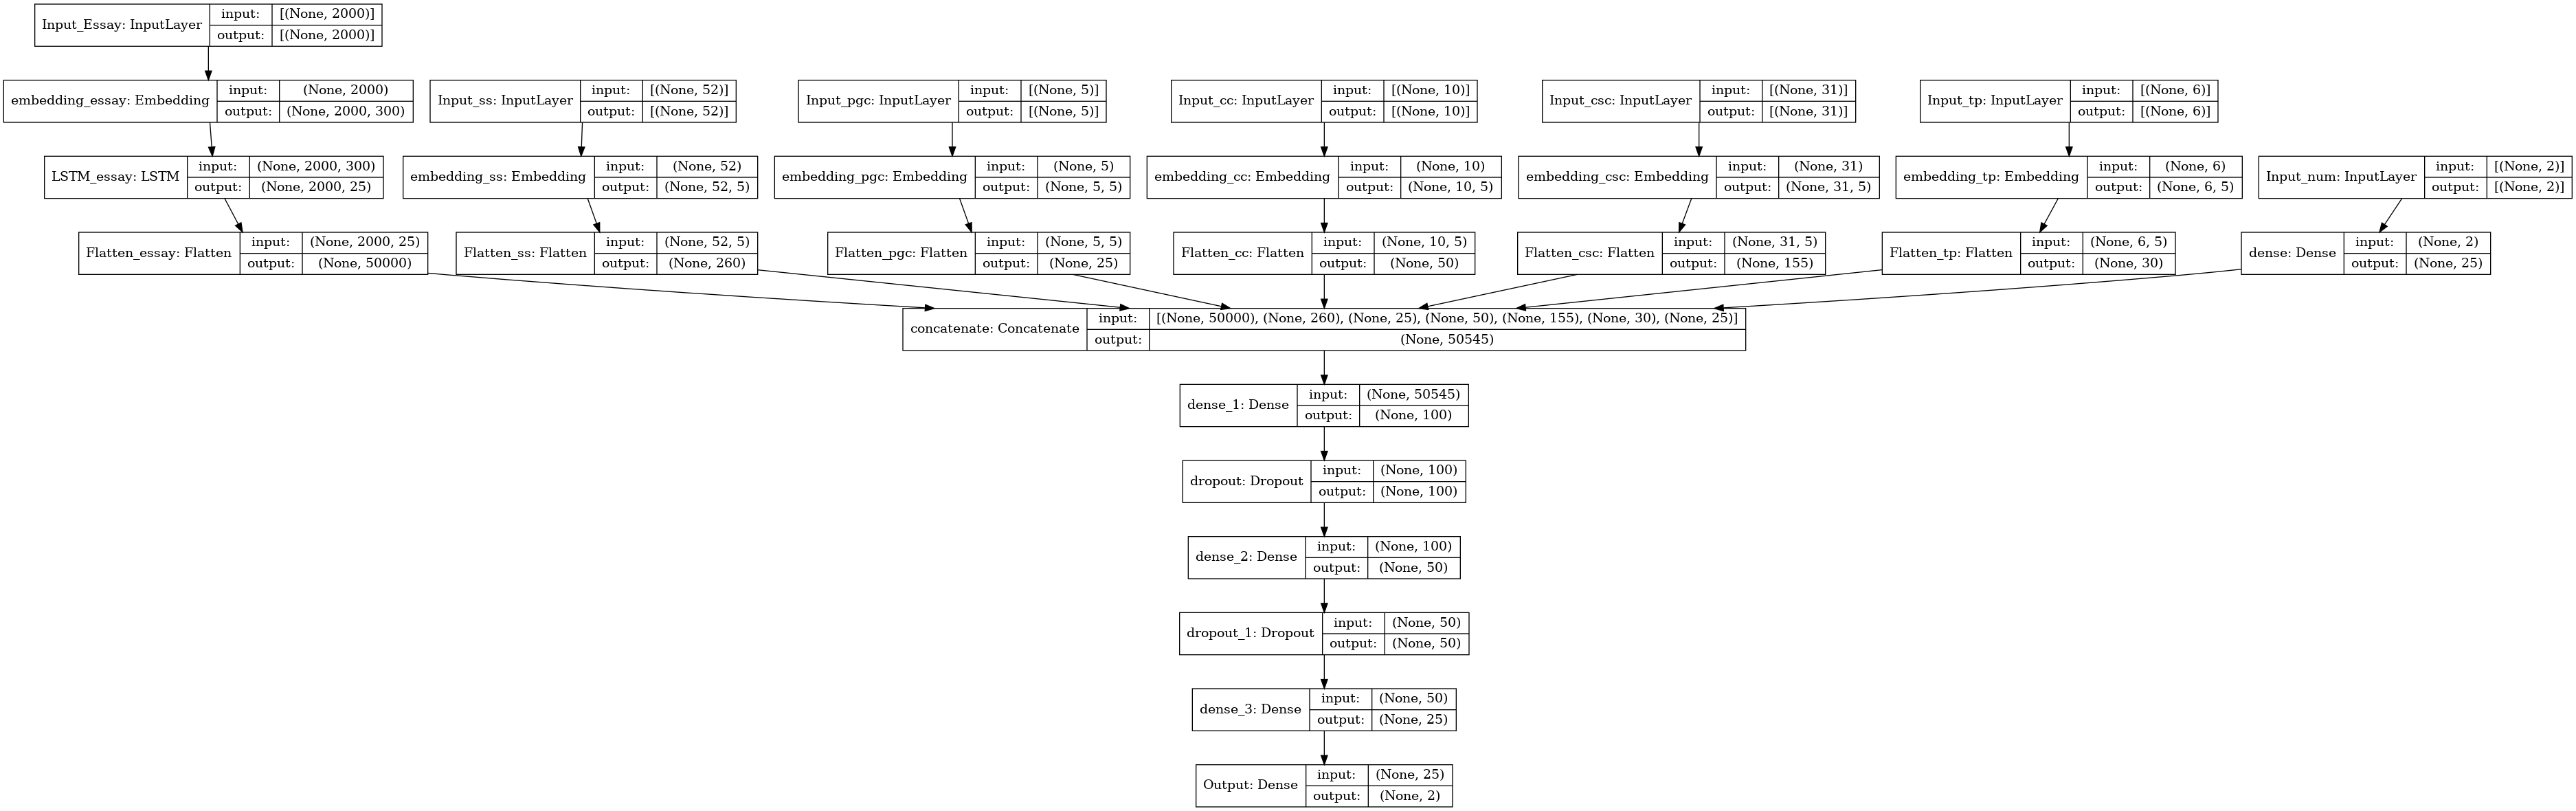

In [70]:
from tensorflow.keras.utils import plot_model
plot_model(model_1, 'model_1.png', show_shapes=True)

## 1.5 Compiling and fititng your model

In [71]:
#define custom auc as metric , do not use tf.keras.metrics
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2
# compile and fit your model

In [72]:
#https://www.tensorflow.org/api_docs/python/tf/py_function
# https://stackoverflow.com/a/46844409 - custom AUC reference 1
# https://www.kaggle.com/c/santander-customer-transaction-prediction/discussion/80807  - custom AUC reference 2

from sklearn.metrics import roc_auc_score
import tensorflow as tf
def auc1(y_true, y_pred):
    if len(np.unique(y_true[:,1])) == 1:
        return 0.5
    else:
        return roc_auc_score(y_true, y_pred)

def aucroc(y_true, y_pred):
    return tf.py_function(auc1, (y_true, y_pred), tf.double) #tf.compat.v1.py_func(roc_auc_score, (y_true, y_pred), tf.double)

def changeLearningRate(epoch,lr):
  if epoch<30:
    lr=0.0001
    return lr
  else :
    lr=0.00001
    return lr

In [73]:
#lrschedule = tensorflow.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model_1.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',aucroc])

#earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=3, verbose=1)

filepath= "best_model_L1.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

In [74]:
log_dir = os.path.join("logs1",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model_1.fit([X_train_essay_padded,X_train_school_state,X_train_pgc,X_train_cc,X_train_csc,X_train_teacher_prefix,df_num_tr.values],y_train_encoded,epochs=10, 
            validation_data=([X_test_essay_padded,X_test_school_state,X_test_pgc,X_test_cc,X_test_csc,X_test_teacher_prefix,df_num_te.values],y_test_encoded), 
            batch_size=128,
           callbacks=[checkpoint,tensorboard_callback])

2022-03-01 18:38:07.524581: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 18:38:07.524630: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-01 18:38:07.527786: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1614] Profiler found 1 GPUs
2022-03-01 18:38:07.924283: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 18:38:07.924494: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-01 18:38:08.112889: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 611784000 exceeds 10% of free system memory.
2022-03-01 18:38:08.594641: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15906384 exceeds 10% of free system memory.
2022-03-01 18:38:08.642390: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 15906384 exceeds 10% of free system memory.
2022-03-01

Epoch 1/10


2022-03-01 18:38:10.914845: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 20218000 exceeds 10% of free system memory.
2022-03-01 18:38:12.569070: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


  1/598 [..............................] - ETA: 43:17 - loss: 1.0816 - accuracy: 0.5938 - aucroc: 0.4821

2022-03-01 18:38:13.232962: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 18:38:13.233014: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/598 [..............................] - ETA: 6:18 - loss: 3.8160 - accuracy: 0.7148 - aucroc: 0.4703 

2022-03-01 18:38:13.772371: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-01 18:38:13.781894: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-01 18:38:13.997901: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 10457 callback api events and 10450 activity events. 
2022-03-01 18:38:14.226943: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 18:38:14.518784: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14

2022-03-01 18:38:14.620057: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14/5e03f8d90de5.trace.json.gz


  3/598 [..............................] - ETA: 9:15 - loss: 3.1205 - accuracy: 0.7578 - aucroc: 0.4943

2022-03-01 18:38:14.839014: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14

2022-03-01 18:38:14.845509: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14/5e03f8d90de5.memory_profile.json.gz
2022-03-01 18:38:14.849325: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14
Dumped tool data for xplane.pb to logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14/5e03f8d90de5.xplane.pb
Dumped tool data for overview_page.pb to logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14/5e03f8d90de5.overview_page.pb
Dumped tool data for input_pipeline.pb to logs1/fits/20220301-183807/train/plugins/profile/2022_03_01_18_38_14/5e03f8d90de5.input_p

598/598 [==============================] - 83s 131ms/step - loss: 0.5900 - accuracy: 0.8466 - aucroc: 0.6956 - val_loss: 0.4245 - val_accuracy: 0.8486 - val_aucroc: 0.7356

Epoch 00001: val_accuracy improved from -inf to 0.84857, saving model to best_model_L1.h5
Epoch 2/10
598/598 [==============================] - 68s 114ms/step - loss: 0.4173 - accuracy: 0.8488 - aucroc: 0.7396 - val_loss: 0.4035 - val_accuracy: 0.8498 - val_aucroc: 0.7477

Epoch 00002: val_accuracy improved from 0.84857 to 0.84982, saving model to best_model_L1.h5
Epoch 3/10
598/598 [==============================] - 77s 130ms/step - loss: 0.4161 - accuracy: 0.8480 - aucroc: 0.7492 - val_loss: 0.4381 - val_accuracy: 0.8486 - val_aucroc: 0.7462

Epoch 00003: val_accuracy did not improve from 0.84982
Epoch 4/10
598/598 [==============================] - 67s 113ms/step - loss: 0.4182 - accuracy: 0.8497 - aucroc: 0.7545 - val_loss: 0.4366 - val_accuracy: 0.8516 - val_aucroc: 0.7512

Epoch 00004: val_accuracy improved fr

# <font color='red'> Model-2 </font>

Use the same model as above but for 'input_seq_total_text_data' give only some words in the sentance not all the words. Filter the words as below. 

<pre>
1. Fit TF-IDF vectorizer on the Train data <br>
2. Get the idf value for each word we have in the train data. Please go through <a  href='https://stackoverflow.com/questions/23792781/tf-idf-feature-weights-using-sklearn-feature-extraction-text-tfidfvectorizer'>this</a><br>

3. Do some analysis on the Idf values and based on those values choose the low and high threshold value. Because very 
frequent words and very very rare words don't give much information.
Hint - A preferable IDF range is 2-11 for model 2. <br>
4.Remove the low idf value and high idf value words from the train and test data. You can go through each of the
sentence of train and test data and include only those features(words) which are present in the defined IDF range.
5. Perform tokenization on the modified text data same as you have done for previous model.
6. Create embedding matrix for model 2 and then use the rest of the features similar to previous model.
7. Define the model, compile and fit the model.
</pre>

In [75]:
X_train.essay[:5]

81389    my third fourth fifth grade esol students come...
66920    our school awesome community school students t...
40287    my students attend large school title 1 we get...
95942    my students walk class every day eager know da...
17176    my students 4th graders rural suburban area no...
Name: essay, dtype: object

In [76]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec = TfidfVectorizer()
vec_essay = tfidf_vec.fit(X_train.essay)

In [77]:
essay_idf = tfidf_vec.idf_ 
essay_idf

array([ 7.15710976,  5.93297128, 11.55155891, ..., 11.55155891,
       11.1460938 , 11.55155891])

In [78]:
len(essay_idf)

48910

In [79]:
idf_values_inrange = [ idf_val for idf_val in essay_idf if(idf_val >= 2 and idf_val <= 10) ]
len(idf_values_inrange)

15077

In [80]:
#https://stackoverflow.com/questions/34232190/scikit-learn-tfidfvectorizer-how-to-get-top-n-terms-with-highest-tf-idf-score
idf_sorting = np.argsort(idf_values_inrange)[::-1]

In [81]:
idf_sorting

array([13002,  7656,  3266, ...,  9242,  8962, 15009])

In [82]:
essay_words = vec_essay.get_feature_names()

In [83]:
new_words = {essay_words[idx] for  idx in idf_sorting}

In [84]:
def skip_words(sentences):
    snt_withskipedwords = []
    for sentence in tqdm(sentences):
        snt = ' '.join(wd for wd in sentence.split() if wd in new_words)
        snt_withskipedwords.append(snt)
    return snt_withskipedwords

In [85]:
X_train_tfidf_essay = skip_words(X_train.essay.values)
X_test_tfidf_essay = skip_words(X_test.essay.values)


100%|██████████| 32775/32775 [00:00<00:00, 38156.48it/s]


In [86]:
len(X_train_tfidf_essay)

76473

In [87]:
len_array_texts = [ len(x) for x in X_train_tfidf_essay]

np.percentile(len_array_texts,97)

500.0

In [88]:
tk_tfidf = text.Tokenizer()
tk_tfidf.fit_on_texts(X_train_tfidf_essay)

max_len = 500
X_train_essay_seq_t = tk_tfidf.texts_to_sequences(X_train_tfidf_essay)
X_train_essay_padded_t = sequence.pad_sequences(X_train_essay_seq_t, maxlen=max_len)

X_test_essay_seq_t = tk_tfidf.texts_to_sequences(X_test_tfidf_essay)
X_test_essay_padded_t = sequence.pad_sequences(X_test_essay_seq_t, maxlen=max_len)

In [89]:
word_index = tk_tfidf.word_index
embedding_matrix = np.zeros((len(word_index) + 1, 300))

for word, i in tqdm(word_index.items()):
  embedding_vector = embeddings_index.get(word)
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

100%|██████████| 15077/15077 [00:00<00:00, 295665.47it/s]


In [90]:
out_dimention = 5

In [91]:
#essay
input_essay = Input(shape=(max_len,),name = 'Input_Essay_tfidf')
embedding_essay = Embedding(len(word_index) + 1,300,weights=[embedding_matrix],input_length=max_len,trainable=False,name = 'embedding_essay_tfidf')(input_essay)
LSTM_essay = LSTM(name='LSTM_essay', units=25,return_sequences=True)(embedding_essay)
flatten_essay = Flatten(data_format='channels_last',name='Flatten_essay')(LSTM_essay)
model_e = Model(inputs=input_essay,outputs=flatten_essay)

#School State
input_ss = Input(shape=(len(tk_ss.word_index) + 1,),name = 'Input_ss')
embedding_ss = Embedding(len(tk_ss.word_index) + 1,out_dimention,input_length=X_train_school_state.shape[1],trainable=True,name = 'embedding_ss')(input_ss)
flatten_ss = Flatten(data_format='channels_last',name='Flatten_ss')(embedding_ss)
model_ss = Model(inputs=input_ss,outputs=flatten_ss)

#project_grade_category
input_pgc = Input(shape=(len(tk_pgc.word_index) + 1,),name = 'Input_pgc')
embedding_pgc = Embedding(len(tk_pgc.word_index) + 1,out_dimention,input_length=X_train_pgc.shape[1],trainable=True,name = 'embedding_pgc')(input_pgc)
flatten_pgc = Flatten(data_format='channels_last',name='Flatten_pgc')(embedding_pgc)
model_pgc = Model(inputs=input_pgc,outputs=flatten_pgc)

#clean_categories
input_cc = Input(shape=(len(tk_cc.word_index) + 1,),name = 'Input_cc')
embedding_cc = Embedding(len(tk_cc.word_index) + 1,out_dimention,input_length=X_train_cc.shape[1],trainable=True,name = 'embedding_cc')(input_cc)
flatten_cc = Flatten(data_format='channels_last',name='Flatten_cc')(embedding_cc)
model_cc = Model(inputs=input_cc,outputs=flatten_cc)

#clean_subcategories
input_csc = Input(shape=(len(tk_csc.word_index) + 1,),name = 'Input_csc')
embedding_csc = Embedding(len(tk_csc.word_index) + 1,out_dimention,input_length=X_train_csc.shape[1],trainable=True,name = 'embedding_csc')(input_csc)
flatten_csc = Flatten(data_format='channels_last',name='Flatten_csc')(embedding_csc)
model_csc = Model(inputs=input_csc,outputs=flatten_csc)

#teacher prefix
input_tp = Input(shape=(len(tk_tp.word_index) + 1,),name = 'Input_tp')
embedding_tp = Embedding(len(tk_tp.word_index) + 1,out_dimention,input_length=X_train_teacher_prefix.shape[1],trainable=True,name = 'embedding_tp')(input_tp)
flatten_tp = Flatten(data_format='channels_last',name='Flatten_tp')(embedding_tp)
model_tp = Model(inputs=input_tp,outputs=flatten_tp)

#numerical data
input_num = Input(shape=(2,),name = 'Input_num')
dense_num = Dense(25,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(input_num)
model_num = Model(inputs=input_num,outputs=dense_num)

concat_Layer = tensorflow.keras.layers.concatenate([model_e.output,model_ss.output,model_pgc.output,model_cc.output,model_csc.output,model_tp.output,model_num.output])

DnsL = Dense(64,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(concat_Layer)
DnsL  =  Dropout(0.2)(DnsL)


DnsL = Dense(32,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)

DnsL  =  Dropout(0.1)(DnsL)

DnsL = Dense(16,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)


Output = Dense(units=2,activation='softmax',kernel_initializer=tensorflow.keras.initializers.glorot_normal(seed=3),name='Output')(DnsL)

In [92]:
model_2= Model(inputs=[model_e.input,model_ss.input,model_pgc.input,model_cc.input,model_csc.input,model_tp.input,model_num.input],outputs=Output)

In [93]:
model_2.summary()

Model: "model_15"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Essay_tfidf (InputLayer)  [(None, 500)]        0                                            
__________________________________________________________________________________________________
embedding_essay_tfidf (Embeddin (None, 500, 300)     4523400     Input_Essay_tfidf[0][0]          
__________________________________________________________________________________________________
Input_ss (InputLayer)           [(None, 52)]         0                                            
__________________________________________________________________________________________________
Input_pgc (InputLayer)          [(None, 5)]          0                                            
___________________________________________________________________________________________

In [94]:
#lrschedule = tensorflow.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
model_2.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',aucroc])

#earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=3, verbose=1)

filepath= "best_model_L2.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_aucroc',  verbose=1, save_best_only=True, mode='max')

In [95]:
log_dir = os.path.join("logs2",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model_2.fit([X_train_essay_padded_t,X_train_school_state,X_train_pgc,X_train_cc,X_train_csc,X_train_teacher_prefix,df_num_tr.values],y_train_encoded,epochs=10, 
            validation_data=([X_test_essay_padded_t,X_test_school_state,X_test_pgc,X_test_cc,X_test_csc,X_test_teacher_prefix,df_num_te.values],y_test_encoded), 
            batch_size=128,
           callbacks=[checkpoint,tensorboard_callback])

2022-03-01 18:54:09.560377: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 18:54:09.561080: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-01 18:54:09.959945: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 18:54:09.960136: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/10
  1/598 [..............................] - ETA: 22:17 - loss: 0.9534 - accuracy: 0.7578 - aucroc: 0.5398

2022-03-01 18:54:12.619442: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 18:54:12.619803: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/598 [..............................] - ETA: 3:17 - loss: 0.8944 - accuracy: 0.8320 - aucroc: 0.5156 

2022-03-01 18:54:12.950098: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-01 18:54:12.954132: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-01 18:54:13.115803: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 2957 callback api events and 2950 activity events. 
2022-03-01 18:54:13.170445: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 18:54:13.244179: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs2/fits/20220301-185409/train/plugins/profile/2022_03_01_18_54_13

2022-03-01 18:54:13.274607: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs2/fits/20220301-185409/train/plugins/profile/2022_03_01_18_54_13/5e03f8d90de5.trace.json.gz
2022-03-01 18:54:13.354268: I tensorflow/core/profiler/rpc/client/save_profi

598/598 [==============================] - 26s 39ms/step - loss: 0.4857 - accuracy: 0.8484 - aucroc: 0.6755 - val_loss: 0.4389 - val_accuracy: 0.8486 - val_aucroc: 0.6993

Epoch 00001: val_aucroc improved from -inf to 0.69928, saving model to best_model_L2.h5
Epoch 2/10
598/598 [==============================] - 22s 36ms/step - loss: 0.4208 - accuracy: 0.8486 - aucroc: 0.7076 - val_loss: 0.4125 - val_accuracy: 0.8486 - val_aucroc: 0.7046

Epoch 00002: val_aucroc improved from 0.69928 to 0.70462, saving model to best_model_L2.h5
Epoch 3/10
598/598 [==============================] - 23s 38ms/step - loss: 0.4050 - accuracy: 0.8486 - aucroc: 0.7200 - val_loss: 0.4069 - val_accuracy: 0.8486 - val_aucroc: 0.7042

Epoch 00003: val_aucroc did not improve from 0.70462
Epoch 4/10
598/598 [==============================] - 23s 38ms/step - loss: 0.3970 - accuracy: 0.8486 - aucroc: 0.7282 - val_loss: 0.4067 - val_accuracy: 0.8486 - val_aucroc: 0.6987

Epoch 00004: val_aucroc did not improve from 0.

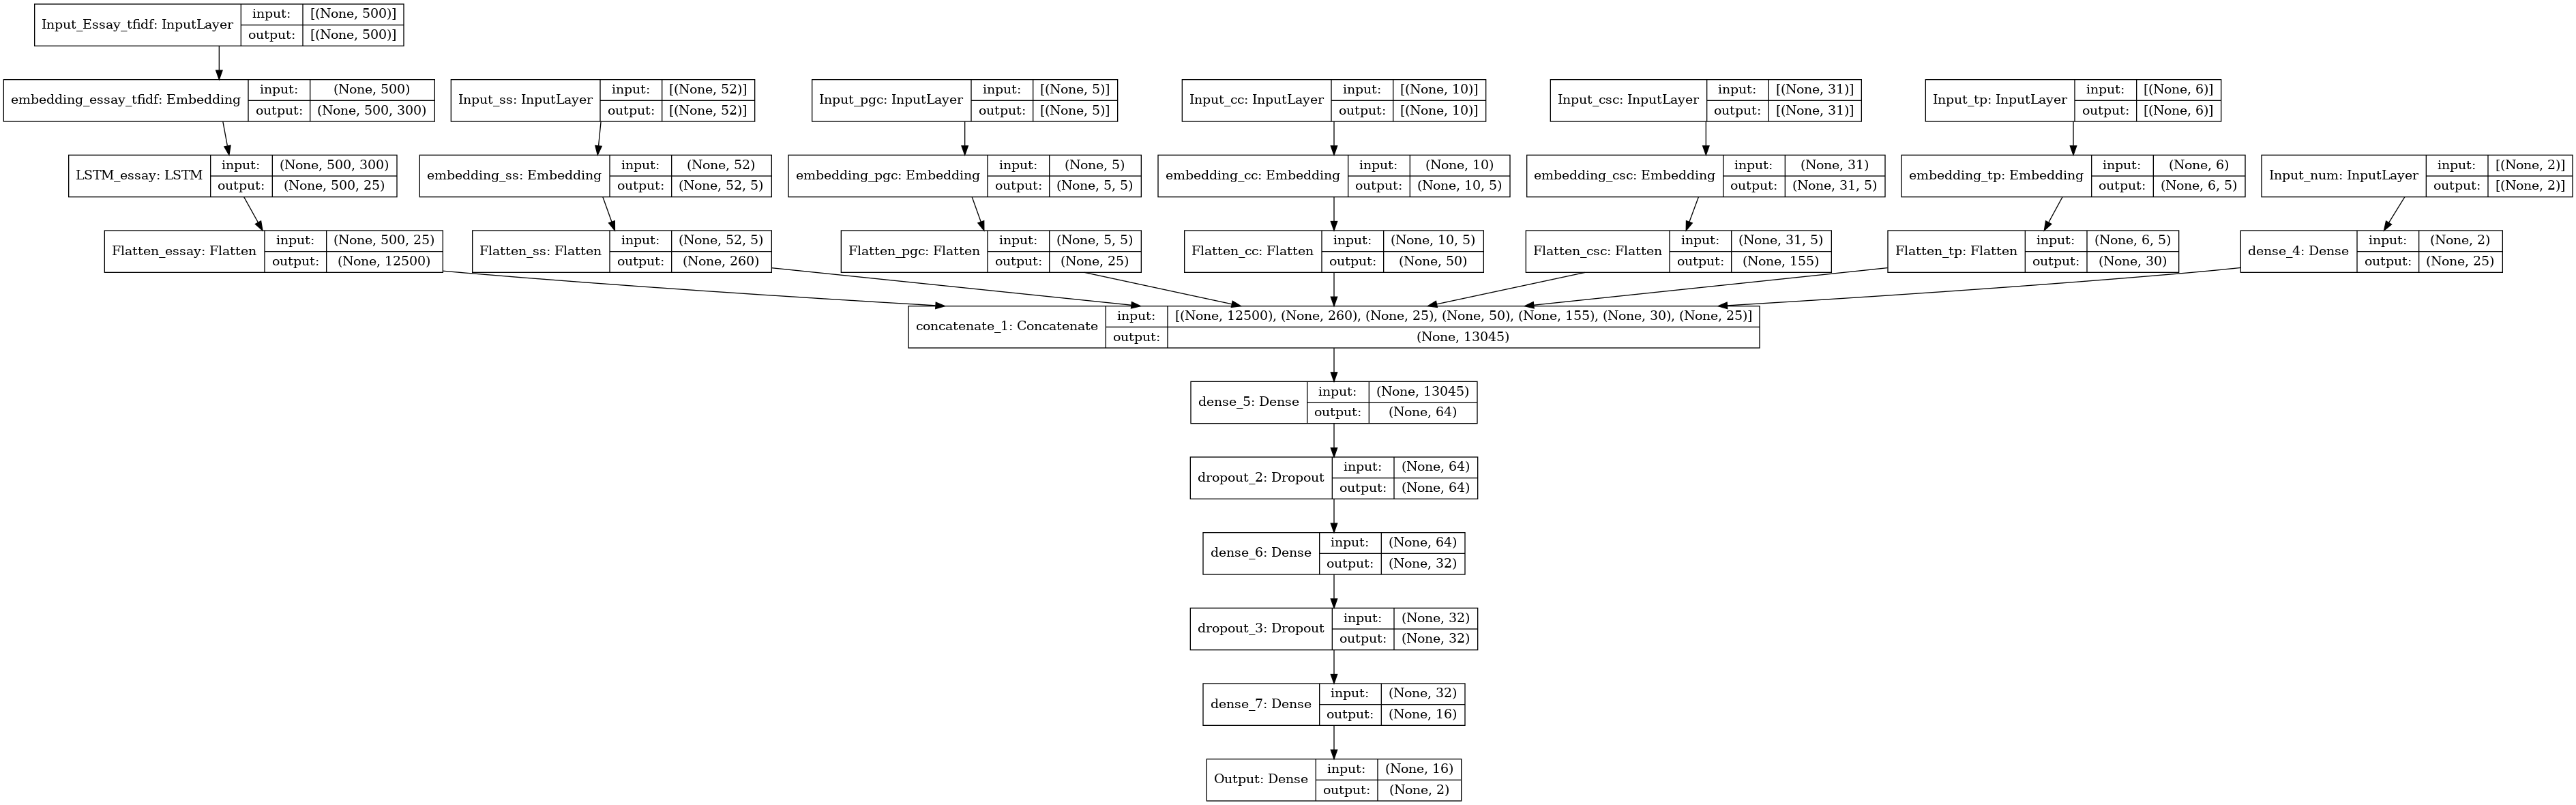

In [96]:
from tensorflow.keras.utils import plot_model
plot_model(model_2, 'model_2.png', show_shapes=True)

# <font color='red'> Model-3 </font>

<img src='https://i.imgur.com/fkQ8nGo.png'>
ref: https://i.imgur.com/fkQ8nGo.png

In [97]:
#in this model you can use the text vectorized data from model1 
#for other than text data consider the following steps
# you have to perform one hot encoding of categorical features. You can use onehotencoder() or countvectorizer() for the same.
# Stack up standardised numerical features and all the one hot encoded categorical features
#the input to conv1d layer is 3d, you can convert your 2d data to 3d using np.newaxis
# Note - deep learning models won't work with sparse features, you have to convert them to dense features before fitting in the model.

In [98]:
#other than text data
#lets compile it in one
X_train_school_state.shape,X_train_pgc.shape,X_train_cc.shape,X_train_csc.shape,X_train_teacher_prefix.shape,df_num_tr.values.shape

((76473, 52), (76473, 5), (76473, 10), (76473, 31), (76473, 6), (76473, 2))

In [99]:
a = list(X_test_school_state)

In [100]:
a[0]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0.])

In [101]:
#Reference Notebook
#https://thatascience.com/learn-numpy/concatenate-numpy-arrays/

from scipy.sparse import hstack
X_train_other = np.hstack([np.array(X_train_school_state),np.array(X_train_pgc),np.array(X_train_cc),
                        np.array(X_train_csc),np.array(X_train_teacher_prefix),np.array(df_num_tr.values)])
X_test_other = np.hstack([X_test_school_state,X_test_pgc,X_test_cc,X_test_csc,X_test_teacher_prefix,df_num_te.values])
print("Final Data matrix")
print(X_train_other.shape)
print(X_test_other.shape)

Final Data matrix
(76473, 106)
(32775, 106)


In [102]:
from numpy import zeros, newaxis

In [103]:
X_train_other.shape

(76473, 106)

In [104]:
max_len =2000

In [105]:
#X_train_other_r = X_train_other[: ,:, newaxis ]
#X_test_other_r = X_test_other[:,:, newaxis ]
#X_train_other_r.shape,X_test_other_r.shape

In [106]:
#https://stackoverflow.com/questions/66718335/input-0-of-layer-conv1d-is-incompatible-with-the-layer-expected-min-ndim-3-f
#essay
input_essay = Input(shape=(max_len,),name = 'Input_Essay')
embedding_essay = Embedding(len(word_index) + 1,300,weights=[embedding_matrix],input_length=max_len,trainable=False,name = 'embedding_essay')(input_essay)
LSTM_essay = LSTM(name='LSTM_essay', units=25,return_sequences=True)(embedding_essay)
flatten_essay = Flatten(data_format='channels_last',name='Flatten_essay')(LSTM_essay)
model_e = Model(inputs=input_essay,outputs=flatten_essay)

#Other Remaining
input_other = Input(shape=(X_train_other.shape[1],1),name = 'Input_Other')
Conv1D_L1_p = Conv1D(filters=128,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001),
                                            name='Conv1D_L1_p')(input_other)

Conv1D_L2_p = Conv1D(filters=64,kernel_size=3,strides=1,padding='valid',data_format='channels_last',
              activation='relu',kernel_initializer=tf.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.00001),
                                            name='Conv1D_L2_p')(Conv1D_L1_p)

flatten_other = Flatten(data_format='channels_last',name='Flatten_Other')(Conv1D_L2_p)
model_other = Model(inputs=input_other,outputs=flatten_other)

concat_Layer = tensorflow.keras.layers.concatenate([model_e.output,model_other.output])

DnsL = Dense(100,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(concat_Layer)
DnsL  =  Dropout(0.3)(DnsL)


DnsL = Dense(50,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)

DnsL  =  Dropout(0.3)(DnsL)

DnsL = Dense(25,activation='relu',kernel_initializer=tensorflow.keras.initializers.he_normal(seed=30),kernel_regularizer=l2(0.001))(DnsL)


Output = Dense(units=2,activation='softmax',kernel_initializer=tensorflow.keras.initializers.glorot_normal(seed=3),name='Output')(DnsL)

In [107]:
model_3= Model(inputs=[model_e.input,model_other.input],outputs=Output)

In [108]:
model_3.summary()

Model: "model_18"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Input_Essay (InputLayer)        [(None, 2000)]       0                                            
__________________________________________________________________________________________________
Input_Other (InputLayer)        [(None, 106, 1)]     0                                            
__________________________________________________________________________________________________
embedding_essay (Embedding)     (None, 2000, 300)    4523400     Input_Essay[0][0]                
__________________________________________________________________________________________________
Conv1D_L1_p (Conv1D)            (None, 104, 128)     512         Input_Other[0][0]                
___________________________________________________________________________________________

In [109]:
#lrschedule = tensorflow.keras.callbacks.LearningRateScheduler(changeLearningRate)

optimizer=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
model_3.compile(optimizer=optimizer, loss='categorical_crossentropy',metrics=['accuracy',aucroc])

#earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0005, patience=3, verbose=1)

filepath= "best_model_L3.h5" #"model_save/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

log_dir = os.path.join("logs3",'fits', datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tensorflow.keras.callbacks.TensorBoard(log_dir=log_dir,histogram_freq=1,write_graph=True)

model_3.fit([X_train_essay_padded,X_train_other],y_train_encoded,epochs=10, 
            validation_data=([X_test_essay_padded,X_test_other],y_test_encoded), 
            batch_size=128,callbacks=[checkpoint,tensorboard_callback])

2022-03-01 19:00:40.241293: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 19:00:40.241343: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.
2022-03-01 19:00:40.498002: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 19:00:40.498238: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed


Epoch 1/10
  1/598 [..............................] - ETA: 1:03:16 - loss: 1.0414 - accuracy: 0.5703 - aucroc: 0.4744

2022-03-01 19:00:47.599213: I tensorflow/core/profiler/lib/profiler_session.cc:131] Profiler session initializing.
2022-03-01 19:00:47.599257: I tensorflow/core/profiler/lib/profiler_session.cc:146] Profiler session started.


  2/598 [..............................] - ETA: 4:23 - loss: 3.8585 - accuracy: 0.7109 - aucroc: 0.4856   

2022-03-01 19:00:48.055398: I tensorflow/core/profiler/lib/profiler_session.cc:66] Profiler session collecting data.
2022-03-01 19:00:48.063977: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1748] CUPTI activity buffer flushed
2022-03-01 19:00:48.198835: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:673]  GpuTracer has collected 10284 callback api events and 10277 activity events. 
2022-03-01 19:00:48.313596: I tensorflow/core/profiler/lib/profiler_session.cc:164] Profiler session tear down.
2022-03-01 19:00:48.532030: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48

2022-03-01 19:00:48.641698: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for trace.json.gz to logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48/5e03f8d90de5.trace.json.gz


  4/598 [..............................] - ETA: 4:39 - loss: 2.6740 - accuracy: 0.7207 - aucroc: 0.4880

2022-03-01 19:00:48.751918: I tensorflow/core/profiler/rpc/client/save_profile.cc:136] Creating directory: logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48

2022-03-01 19:00:48.755089: I tensorflow/core/profiler/rpc/client/save_profile.cc:142] Dumped gzipped tool data for memory_profile.json.gz to logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48/5e03f8d90de5.memory_profile.json.gz
2022-03-01 19:00:48.757314: I tensorflow/core/profiler/rpc/client/capture_profile.cc:251] Creating directory: logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48
Dumped tool data for xplane.pb to logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48/5e03f8d90de5.xplane.pb
Dumped tool data for overview_page.pb to logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48/5e03f8d90de5.overview_page.pb
Dumped tool data for input_pipeline.pb to logs3/fits/20220301-190040/train/plugins/profile/2022_03_01_19_00_48/5e03f8d90de5.input_p

598/598 [==============================] - 84s 130ms/step - loss: 0.6109 - accuracy: 0.8464 - aucroc: 0.6439 - val_loss: 0.4339 - val_accuracy: 0.8486 - val_aucroc: 0.7054

Epoch 00001: val_accuracy improved from -inf to 0.84857, saving model to best_model_L3.h5
Epoch 2/10
598/598 [==============================] - 77s 129ms/step - loss: 0.4293 - accuracy: 0.8486 - aucroc: 0.7110 - val_loss: 0.4381 - val_accuracy: 0.8486 - val_aucroc: 0.7126

Epoch 00002: val_accuracy did not improve from 0.84857
Epoch 3/10
598/598 [==============================] - 76s 128ms/step - loss: 0.4317 - accuracy: 0.8486 - aucroc: 0.7299 - val_loss: 0.4370 - val_accuracy: 0.8486 - val_aucroc: 0.7153

Epoch 00003: val_accuracy did not improve from 0.84857
Epoch 4/10
598/598 [==============================] - 77s 128ms/step - loss: 0.4388 - accuracy: 0.8486 - aucroc: 0.7387 - val_loss: 0.4827 - val_accuracy: 0.8486 - val_aucroc: 0.7086

Epoch 00004: val_accuracy did not improve from 0.84857
Epoch 5/10
598/598 [

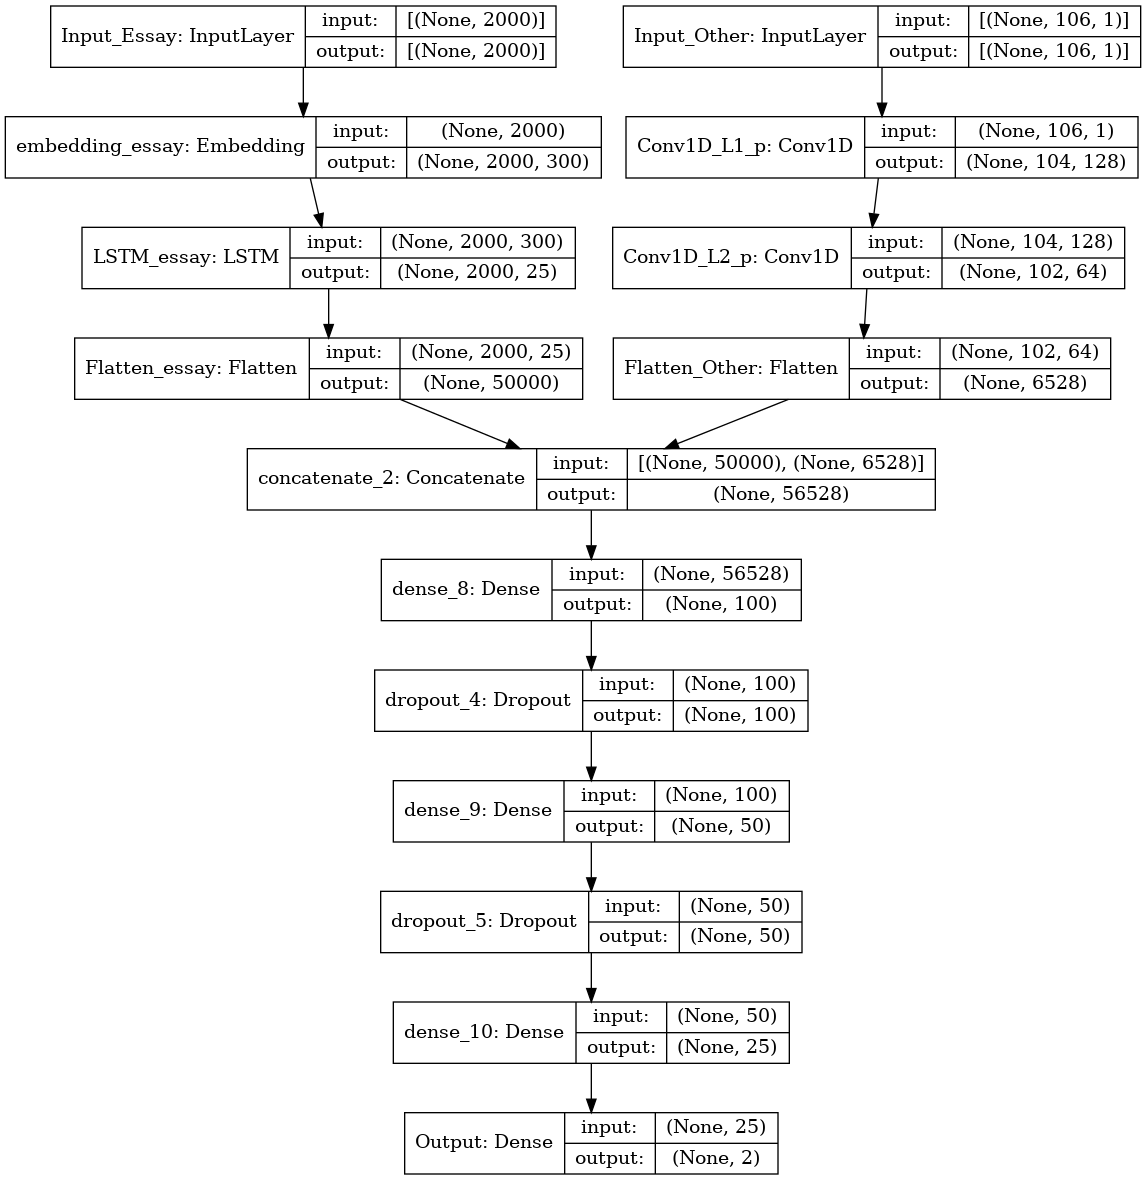

In [11]:
from IPython.display import Image 
Image('model_3.png',width=700,height=700) 

# Observations

In [14]:
#https://www.geeksforgeeks.org/set-pandas-dataframe-background-color-and-font-color-in-python/
import pandas as pd
table_values = [
                ["Model 1","0.7545"," 0.7512","0.4182","0.4366"],
                ["Model 2","0.7076","0.7046","0.4208","0.4125"],
                ["Model 3","0.7458","0.7203","0.4517","0.4649"],
                ]

table_summary = pd.DataFrame(table_values,columns=[ "Model","Train_AUC","val_auc","Train_loss","val_loss"])
table_summary.style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'White',                       
                                    'border-color': 'white'})

,Model,Train_AUC,val_auc,Train_loss,val_loss
0,Model 1,0.7545,0.7512,0.4182,0.4366
1,Model 2,0.7076,0.7046,0.4208,0.4125
2,Model 3,0.7458,0.7203,0.4517,0.4649


1) Each model is run withing 10 epochs.

2) model 1 performed better than all as we are concatenating each learned embedding layer which increased the Val AUC.

3) model 2 feeded on tfidf features on text data , which is performed 5% less thn model in val_AUC.

4) model 3 performed better than model 2 because of convolution layer and filters.